In [41]:
import keras
from keras import callbacks
from models.ffnn_tf import model_simple, model_deeper, model_wider, model_high_capacity
from utils.data_loader import prepare_mnist_data
import pandas as pd

Loading MNIST data...
Preprocessing data...
====== MNIST Dataset Statistics ======
Training samples: 48000
Validation samples: 12000
Test samples: 10000
Input shape: (784,)
Number of classes: 10
Data type: float32
Value range: [0.000, 1.000]

Class distribution in training set:
  Digit 0: 4717.0 samples (9.8%)
  Digit 1: 5391.0 samples (11.2%)
  Digit 2: 4782.0 samples (10.0%)
  Digit 3: 4903.0 samples (10.2%)
  Digit 4: 4658.0 samples (9.7%)
  Digit 5: 4373.0 samples (9.1%)
  Digit 6: 4710.0 samples (9.8%)
  Digit 7: 4986.0 samples (10.4%)
  Digit 8: 4724.0 samples (9.8%)
  Digit 9: 4756.0 samples (9.9%)


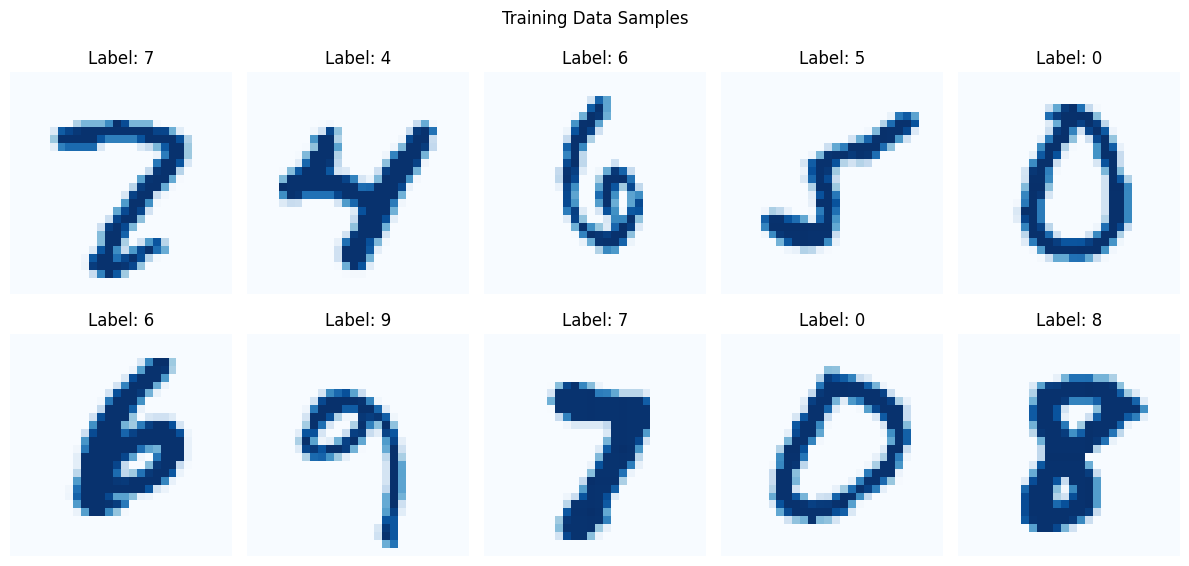

In [39]:
# Load and prepare all data
train_data, val_data, test_data = prepare_mnist_data(
    validation_split=0.2,    # 20% for validation, i.e., 12,000 validation pictures
    normalize=True,          # Scale to [0,1]
    flatten=True,            # Flatten for fully connected layers
    show_samples=True,       # Show sample images
    show_stats=True          # Print dataset statistics
)

# unpack the data for use
(x_train, y_train) = train_data
(x_val, y_val) = val_data
(x_test, y_test) = test_data

# other parameters
mini_batch_size = 32
num_epochs = 10
learning_rate = 0.001

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9366 - loss: 0.1888 - val_accuracy: 0.9593 - val_loss: 0.1581
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9407 - loss: 0.1777 - val_accuracy: 0.9597 - val_loss: 0.1628
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9392 - loss: 0.1823 - val_accuracy: 0.9599 - val_loss: 0.1600
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9415 - loss: 0.1763 - val_accuracy: 0.9582 - val_loss: 0.1630
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9399 - loss: 0.1818 - val_accuracy: 0.9592 - val_loss: 0.1592
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9397 - loss: 0.1846 - val_accuracy: 0.9582 - val_loss: 0.1639
Minimum validation loss: 0.15810303390026093


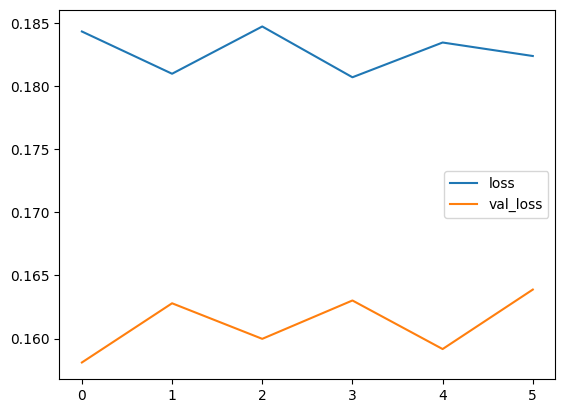

In [36]:
model_simple.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history_1 = model_simple.fit(

    x_train, y_train,
    validation_data=val_data,
    batch_size=mini_batch_size,
    epochs=num_epochs,
    callbacks=[early_stopping],
    verbose=1
)

history_df_1 = pd.DataFrame(history_1.history)
history_df_1.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df_1['val_loss'].min()))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9975 - loss: 0.0072 - val_accuracy: 0.9769 - val_loss: 0.1250
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9776 - val_loss: 0.1197
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9988 - loss: 0.0039 - val_accuracy: 0.9764 - val_loss: 0.1239
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9987 - loss: 0.0036 - val_accuracy: 0.9781 - val_loss: 0.1176
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9981 - loss: 0.0044 - val_accuracy: 0.9755 - val_loss: 0.1290
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 0.9772 - val_loss: 0.1387
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9982 - loss: 0.0046 - val_accuracy: 0.9772 - val_loss: 0.1322
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9997 - loss: 0.0015 - 

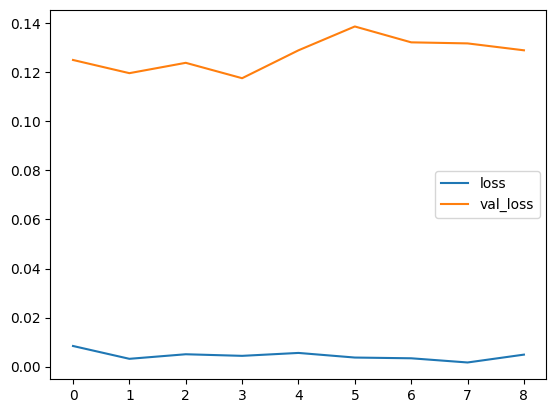

In [37]:
model_wider.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_2 = model_wider.fit(

    x_train, y_train,
    validation_data=val_data,
    batch_size=mini_batch_size,
    epochs=num_epochs,
    callbacks=[early_stopping],
    verbose=1
)

history_df_2 = pd.DataFrame(history_2.history)
history_df_2.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df_2['val_loss'].min()))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9908 - loss: 0.0280 - val_accuracy: 0.9727 - val_loss: 0.1108
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9920 - loss: 0.0230 - val_accuracy: 0.9734 - val_loss: 0.1129
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9934 - loss: 0.0189 - val_accuracy: 0.9720 - val_loss: 0.1195
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9952 - loss: 0.0159 - val_accuracy: 0.9729 - val_loss: 0.1183
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9941 - loss: 0.0184 - val_accuracy: 0.9727 - val_loss: 0.1188
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9953 - loss: 0.0144 - val_accuracy: 0.9715 - val_loss: 0.1344
Minimum validation loss: 0.1108386442065239


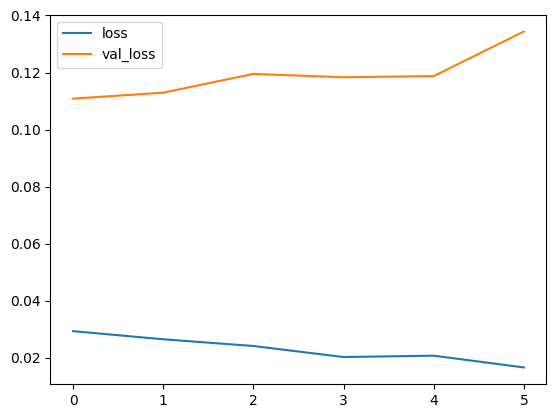

In [40]:
model_deeper.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_3 = model_deeper.fit(

    x_train, y_train,
    validation_data=val_data,
    batch_size=mini_batch_size,
    epochs=num_epochs,
    callbacks=[early_stopping],
    verbose=1
)

history_df_3 = pd.DataFrame(history_3.history)
history_df_3.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df_3['val_loss'].min()))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9905 - loss: 0.0287 - val_accuracy: 0.9709 - val_loss: 0.1273
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9918 - loss: 0.0248 - val_accuracy: 0.9667 - val_loss: 0.1443
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9932 - loss: 0.0223 - val_accuracy: 0.9727 - val_loss: 0.1286
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9934 - loss: 0.0209 - val_accuracy: 0.9672 - val_loss: 0.1430
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9940 - loss: 0.0184 - val_accuracy: 0.9727 - val_loss: 0.1299
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9936 - loss: 0.0195 - val_accuracy: 0.9691 - val_loss: 0.1469
Minimum validation loss: 0.12725001573562622


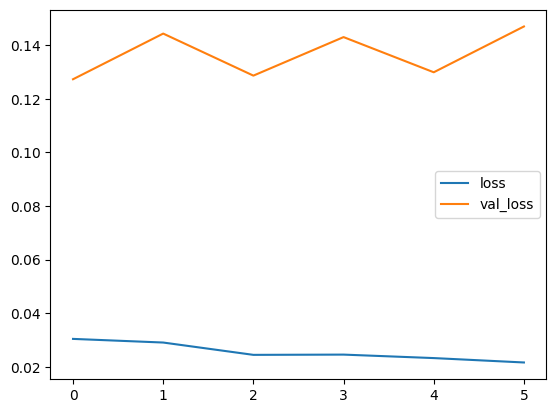

In [42]:
model_high_capacity.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_4 = model_high_capacity.fit(

    x_train, y_train,
    validation_data=val_data,
    batch_size=mini_batch_size,
    epochs=num_epochs,
    callbacks=[early_stopping],
    verbose=1
)

history_df_4 = pd.DataFrame(history_4.history)
history_df_4.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df_4['val_loss'].min()))